In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import numpy as np
import os
import cv2

In [64]:
class Image:
    # initialize, show and save methods
    #------------------------------------------------------
    def __init__(self, path_to_image: str) -> None:
        self.image = imread(path_to_image)
    #------------------------------------------------------
    def show_img(self) -> None:
        plt.imshow(self.image)
        plt.axis('off')
        plt.show()
    #------------------------------------------------------
    def save_img(self, name: str, path: str = '') -> None:
        file_path = os.path.join(path, name + '.jpg')
        plt.imsave(file_path, self.image)
        print(f"Image saved at: {file_path}")
        
    # image convolution methods
    #------------------------------------------------------
    def make_gray(self) -> None:
        # extract the individual color channels
        blue_channel = self.image[:, :, 0]
        green_channel = self.image[:, :, 1]
        red_channel = self.image[:, :, 2]

        # Compute the grayscale values using matrix operations
        gray_values = 0.114 * blue_channel + 0.587 * green_channel + 0.299 * red_channel

        # Create a grayscale image by stacking the gray values along the channel dimension
        gray_image = np.stack((gray_values, gray_values, gray_values), axis=-1)

        # Update the self.image attribute
        self.image = gray_image.astype(np.uint8)
    #------------------------------------------------------
    def invert_color(self) -> None:
        inverted_image = 255 - self.image
        self.image = inverted_image
    #------------------------------------------------------
    def adjust_brightness(self, factor: float) -> None:
        # Convert the image to float for accurate brightness adjustment
        image_float = self.image.astype(np.float32)

        # Adjust the brightness by multiplying the image with the factor
        adjusted_image = image_float * factor

        # Clip the pixel values to the valid range [0, 255]
        adjusted_image = np.clip(adjusted_image, 0, 255)

        # Convert the image back to uint8 format
        self.image = adjusted_image.astype(np.uint8)
    #------------------------------------------------------
    def rotate_image(self, degree: float, direction:str='counterclockwise') -> None:
        # Calculate the rotation angle in radians
        angle = np.radians(degree)

        # Get the image shape
        height, width = self.image.shape[:2]

        # Calculate the rotation center
        center_x = width // 2
        center_y = height // 2

        # Compute sine and cosine of the rotation angle
        cos_theta = np.cos(angle)
        sin_theta = np.sin(angle)

        # Define the rotation matrix
        rotation_matrix = np.array([[cos_theta, -sin_theta, (1 - cos_theta) * center_x + sin_theta * center_y],
                                    [sin_theta, cos_theta, (1 - cos_theta) * center_y - sin_theta * center_x]])

        # Choose the rotation matrix based on the direction
        if direction == 'counterclockwise':
            rotation_matrix = cv2.invertAffineTransform(rotation_matrix)

        # Apply the rotation to the image
        rotated_image = cv2.warpAffine(self.image, rotation_matrix, (width, height))

        # Update the self.image attribute
        self.image = rotated_image
    #------------------------------------------------------
    def resize_image(self, scale_factor: float) -> None:
        # Get the image shape
        height, width = self.image.shape[:2]

        # Calculate the new dimensions
        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)

        # Define the scaling matrix
        scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0]])

        # Apply the scaling to the image
        resized_image = cv2.warpAffine(self.image, scaling_matrix, (new_width, new_height))

        # Update the self.image attribute
        self.image = resized_image
    #------------------------------------------------------
    def mirror_image(self, axis: str = 'horizontal') -> None:
        """
        Mirror the image along the specified axis.

        Parameters:
            axis (str, optional): The axis along which to perform the mirroring.
                Defaults to 'horizontal'. Can be either 'horizontal' or 'vertical'.
        """
        # Get the image shape
        height, width = self.image.shape[:2]

        # Define the reflection matrix
        if axis == 'horizontal':
            reflection_matrix = np.array([[-1, 0, width - 1],
                                          [0, 1, 0]], dtype=np.float32)
        elif axis == 'vertical':
            reflection_matrix = np.array([[1, 0, 0],
                                          [0, -1, height - 1]], dtype=np.float32)
        else:
            raise ValueError("Invalid mirror axis. Please choose 'horizontal' or 'vertical'.")

        # Apply the reflection to the image
        mirrored_image = cv2.warpAffine(self.image, reflection_matrix, (width, height))

        # Update the self.image attribute
        self.image = mirrored_image


<h1><center>Testing The Code</center></h1>

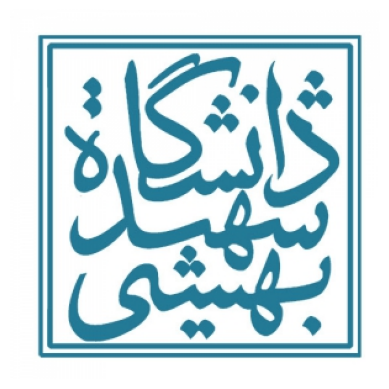

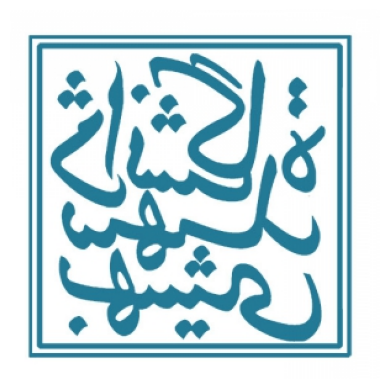

In [65]:
image = Image('img.jpg')
image.show_img()
image.mirror_image()
image.show_img()